# Predicting Whether Or Not A Customer Will Churn
A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out?

## 1. Problem Definition
Classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.

## 2. Data
[GitHub](https://github.com/jafar-shodiq/mlearning-proj/tree/main/project/preventing-customer-churn-with-pyspark)

Attributes: 10, instances: 900

## 3. Evaluation
Binary classification - logistic regression

## 4. Features
* Name : Name of the latest contact at Company
* Age: Customer Age
* Total_Purchase: Total Ads Purchased
* Account_Manager: Binary 0=No manager, 1= Account manager assigned
* Years: Totaly Years as a customer
* Num_sites: Number of websites that use the service.
* Onboard_date: Date that the name of the latest contact was onboarded
* Location: Client HQ Address
* Company: Name of Client Company

# EDA with Pandas and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [2]:
eda = pd.read_csv('customer_churn.csv')
eda.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [3]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [4]:
eda.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


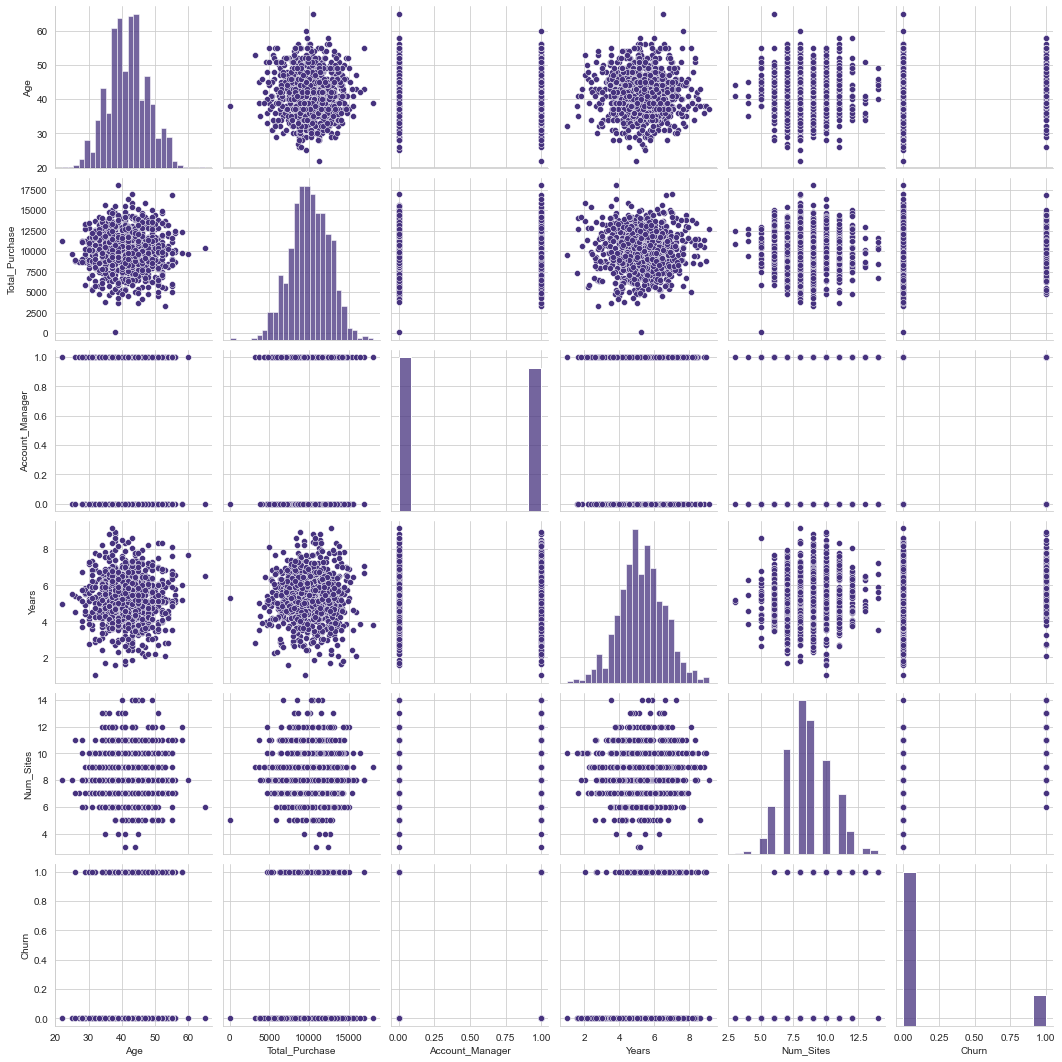

In [6]:
sns.pairplot(eda)

Text(0.5, 1.0, 'Churn Count')

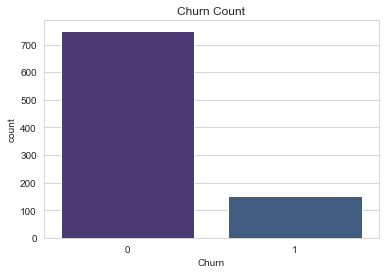

In [11]:
sns.countplot(x='Churn', data=eda)
plt.title('Churn Count')

Text(0.5, 1.0, 'Account Manager Count')

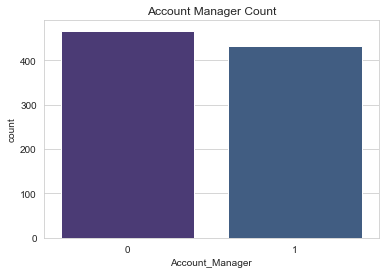

In [12]:
sns.countplot(x='Account_Manager', data=eda)
plt.title('Account Manager Count')

Text(0.5, 1.0, 'Age Distributions')

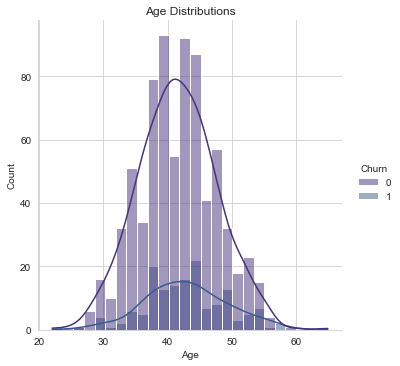

In [13]:
sns.displot(x='Age', data=eda, hue='Churn', kde=True)
plt.title('Age Distributions')

Text(0.5, 1.0, 'Number of Sites Count')

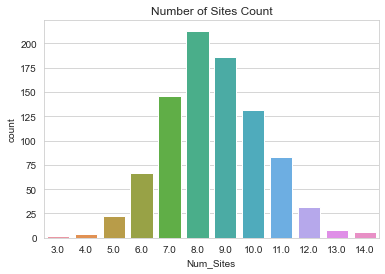

In [63]:
sns.countplot(x='Num_Sites', data=eda)
plt.title('Number of Sites Count')

**Datetime Object**

In [20]:
eda['Onboard_date']

0      2013-08-30 07:00:40
1      2013-08-13 00:38:46
2      2016-06-29 06:20:07
3      2014-04-22 12:43:12
4      2016-01-19 15:31:15
              ...         
895    2007-12-01 13:29:34
896    2008-12-28 15:23:58
897    2014-06-20 05:10:09
898    2012-05-30 00:15:43
899    2010-09-25 12:16:08
Name: Onboard_date, Length: 900, dtype: object

In [21]:
eda['Onboard_date'] = pd.to_datetime(eda['Onboard_date'])
eda['Onboard_date']

0     2013-08-30 07:00:40
1     2013-08-13 00:38:46
2     2016-06-29 06:20:07
3     2014-04-22 12:43:12
4     2016-01-19 15:31:15
              ...        
895   2007-12-01 13:29:34
896   2008-12-28 15:23:58
897   2014-06-20 05:10:09
898   2012-05-30 00:15:43
899   2010-09-25 12:16:08
Name: Onboard_date, Length: 900, dtype: datetime64[ns]

In [22]:
eda['year'] = eda['Onboard_date'].apply(lambda x: x.year)
eda['month'] = eda['Onboard_date'].apply(lambda x: x.month)
eda['day'] = eda['Onboard_date'].apply(lambda x: x.day)
eda['dayofweek'] = eda['Onboard_date'].apply(lambda x: x.dayofweek)
eda['hour'] = eda['Onboard_date'].apply(lambda x: x.hour)

In [23]:
eda.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,year,month,day,dayofweek,hour
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,2013,8,30,4,7
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,2013,8,13,1,0
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,2016,6,29,2,6
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,2014,4,22,1,12
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,2016,1,19,1,15


<AxesSubplot:xlabel='year', ylabel='count'>

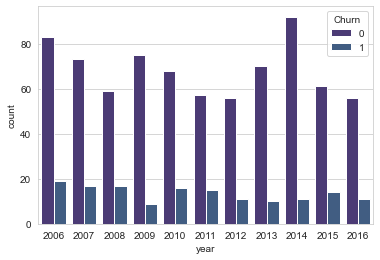

In [24]:
sns.countplot(x='year', data=eda, hue='Churn')

<AxesSubplot:xlabel='month', ylabel='count'>

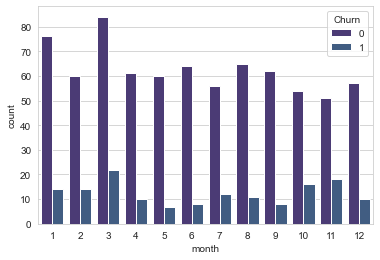

In [25]:
sns.countplot(x='month', data=eda, hue='Churn')

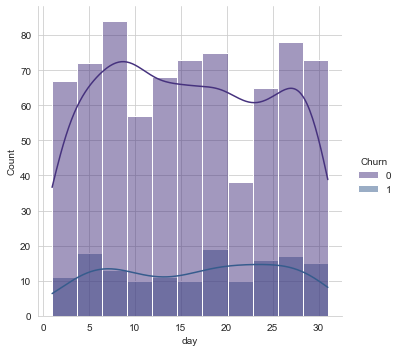

In [30]:
sns.displot(x='day', data=eda, hue='Churn', kde=True)

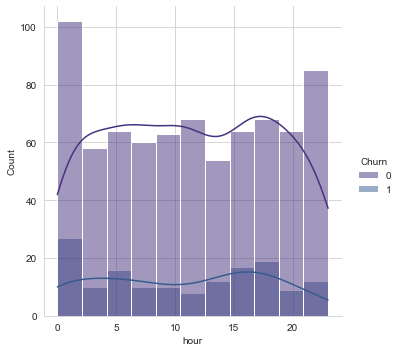

In [31]:
sns.displot(x='hour', data=eda, hue='Churn', kde=True)

**Categorical Features**

In [34]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Names            900 non-null    object        
 1   Age              900 non-null    float64       
 2   Total_Purchase   900 non-null    float64       
 3   Account_Manager  900 non-null    int64         
 4   Years            900 non-null    float64       
 5   Num_Sites        900 non-null    float64       
 6   Onboard_date     900 non-null    datetime64[ns]
 7   Location         900 non-null    object        
 8   Company          900 non-null    object        
 9   Churn            900 non-null    int64         
 10  year             900 non-null    int64         
 11  month            900 non-null    int64         
 12  day              900 non-null    int64         
 13  dayofweek        900 non-null    int64         
 14  hour             900 non-null    int64    

In [32]:
eda['Company'].nunique()

873

In [33]:
eda['Names'].nunique()

899

These 2 attributes will not be used. They had too many unique values.

In [36]:
eda['Location'].sample(20)

150             5728 Michael Rue Riosland, NY 38804-1415
857     773 Davis Ways Apt. 519 West Jamesbury, AR 35583
455    2556 Grant Points New Christopherton, CA 76121...
135    8006 Erin Pass Apt. 415 South Karen, LA 27331-...
899         27252 Olivia Burgs Rivasmouth, MN 80121-6348
824    832 Rachael Fort Suite 115 Lake Danielville, I...
522    510 Nicholas Island Suite 493 Buckchester, MO ...
830                               USNS Hill FPO AA 50331
19         9569 Caldwell Crescent Tanyaborough, RI 30637
767     68378 Jeffrey Locks Apt. 678 Gibbsstad, OR 40474
746      118 Linda Street Suite 025 Hunterberg, WA 50583
249    329 Pierce Place Apt. 176 North Tammybury, WV ...
477    1317 Mcdaniel Plaza Suite 219 Colleenview, TX ...
5      6187 Olson Mountains East Vincentborough, PR 7...
217                        USCGC Gould FPO AP 18053-9165
881                 Unit 6154 Box 5113 DPO AP 65306-0703
147           976 Thomas Garden Lake Chad, DC 12638-0139
697      2819 Wright Summit Nic

The numbers at the start and the end, as well as the state IDs could be extracted if only they are consistent in length. For that reason, we won't be using this attribute too.

**Correlation**

<AxesSubplot:>

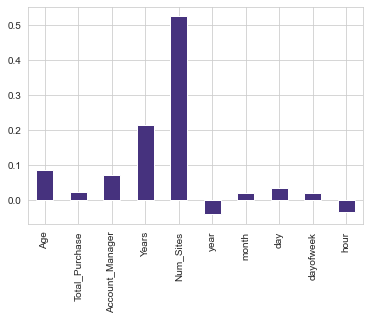

In [49]:
eda.loc[:, eda.columns!='Churn'].corrwith(eda['Churn']).plot.bar()

`Num_Sites` correlate most with `Churn`.

In [65]:
eda.isna().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
year               0
month              0
day                0
dayofweek          0
hour               0
dtype: int64

Now that we have explored our data, we will jump into Spark. So what to do when using spark:
* Convert `Onboard_date` to datetime object and extract year, month, day, dayofweek, and hour
* Drop `Names`, `Location`, and `Company`

# Spark

Keep in mind that we haven't done any data cleaning nor feature engineering. What we did was only exploring the data.

In [133]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('churn').getOrCreate()

In [66]:
df = spark.read.csv('customer_churn.csv', inferSchema=True, header=True)
df.show()

+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|             Company|Churn|
+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|2013-08-30 07:00:40|10265 Elizabeth M...|          Harvey LLC|    1|
|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|2013-08-13 00:38:46|6157 Frank Garden...|          Wilson PLC|    1|
|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|2016-06-29 06:20:07|1331 Keith Court ...|Miller, Johnson a...|    1|
|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|2014-04-22 12:43:12|13120 Daniel Moun...|           Smith Inc|    1|
|     

Notice that the display is not as pretty as using Pandas. The reason is that Spark was intended for very large datasets. So in order to keep RAM usage minimum, the visuals are minimum too.

In [67]:
df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



## Convert `Onboard_date` into datetime object

In [68]:
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import year, month, dayofmonth, dayofweek, hour

In [69]:
new_df = df.withColumn('record_date', df['Onboard_date'].cast(TimestampType()))

In [70]:
new_df = new_df.withColumn('onboard_year', year(new_df['record_date']))
new_df = new_df.withColumn('onboard_month', month(new_df['record_date']))
new_df = new_df.withColumn('onboard_dayofmonth', dayofmonth(new_df['record_date']))
new_df = new_df.withColumn('onboard_dayofweek', dayofweek(new_df['record_date']))
new_df = new_df.withColumn('onboard_hour', hour(new_df['record_date']))

In [71]:
new_df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- record_date: timestamp (nullable = true)
 |-- onboard_year: integer (nullable = true)
 |-- onboard_month: integer (nullable = true)
 |-- onboard_dayofmonth: integer (nullable = true)
 |-- onboard_dayofweek: integer (nullable = true)
 |-- onboard_hour: integer (nullable = true)



In [72]:
new_df.select(['record_date', 'onboard_year', 'onboard_month', 'onboard_dayofmonth', 'onboard_dayofweek', 'onboard_hour']).show()

+-------------------+------------+-------------+------------------+-----------------+------------+
|        record_date|onboard_year|onboard_month|onboard_dayofmonth|onboard_dayofweek|onboard_hour|
+-------------------+------------+-------------+------------------+-----------------+------------+
|2013-08-30 07:00:40|        2013|            8|                30|                6|           7|
|2013-08-13 00:38:46|        2013|            8|                13|                3|           0|
|2016-06-29 06:20:07|        2016|            6|                29|                4|           6|
|2014-04-22 12:43:12|        2014|            4|                22|                3|          12|
|2016-01-19 15:31:15|        2016|            1|                19|                3|          15|
|2009-03-03 23:13:37|        2009|            3|                 3|                3|          23|
|2016-12-05 03:35:43|        2016|           12|                 5|                2|           3|
|2006-03-0

Spark is quite different from Scikit-learn/sklearn when it comes to training the data. In sklearn, we can just feed the model with the data using all columns as it is (after dealing with missing values or categorical features).

But in spark, we will have to format the data so that it will only have **2** columns: `features` and `label`. `features` is a vector/array of the features or independent variables of our data, and `label` is the dependent variable that we're trying to predict (can also be said, `features`:X, `label`:Y).

## Finalizing the Data

**Choosing which features/attributes to be used**

Remember, we're going to drop `Names`, `Location`, and `Company`

In [88]:
final_df = new_df.select('Churn',
                         'Age',
                         'Total_Purchase',
                         'Account_Manager',
                         'Years',
                         'Num_Sites',
                         'onboard_year',
                         'onboard_month',
                         'onboard_dayofmonth',
                         'onboard_dayofweek',
                         'onboard_hour')
final_df.printSchema()

root
 |-- Churn: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- onboard_year: integer (nullable = true)
 |-- onboard_month: integer (nullable = true)
 |-- onboard_dayofmonth: integer (nullable = true)
 |-- onboard_dayofweek: integer (nullable = true)
 |-- onboard_hour: integer (nullable = true)



**Assemble into `features` and `label`**

In [89]:
from pyspark.ml.feature import VectorAssembler

In [90]:
assembler = VectorAssembler(inputCols=['Age',
                                       'Total_Purchase',
                                       'Account_Manager',
                                       'Years',
                                       'Num_Sites',
                                       'onboard_year',
                                       'onboard_month',
                                       'onboard_dayofmonth',
                                       'onboard_dayofweek',
                                       'onboard_hour'],
                            outputCol='features')

In [91]:
output = assembler.transform(final_df)
output.printSchema()

root
 |-- Churn: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- onboard_year: integer (nullable = true)
 |-- onboard_month: integer (nullable = true)
 |-- onboard_dayofmonth: integer (nullable = true)
 |-- onboard_dayofweek: integer (nullable = true)
 |-- onboard_hour: integer (nullable = true)
 |-- features: vector (nullable = true)



In [93]:
output.select('features').show()

+--------------------+
|            features|
+--------------------+
|[42.0,11066.8,0.0...|
|[41.0,11916.22,0....|
|[38.0,12884.75,0....|
|[42.0,8010.76,0.0...|
|[37.0,9191.58,0.0...|
|[48.0,10356.02,0....|
|[44.0,11331.58,1....|
|[32.0,9885.12,1.0...|
|[43.0,14062.6,1.0...|
|[40.0,8066.94,1.0...|
|[30.0,11575.37,1....|
|[45.0,8771.02,1.0...|
|[45.0,8988.67,1.0...|
|[40.0,8283.32,1.0...|
|[41.0,6569.87,1.0...|
|[38.0,10494.82,1....|
|[45.0,8213.41,1.0...|
|[43.0,11226.88,0....|
|[53.0,5515.09,0.0...|
|[46.0,8046.4,1.0,...|
+--------------------+
only showing top 20 rows



In [94]:
final_data = output.select('features', output['Churn'].alias('label'))
final_data.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



In [95]:
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)



Now that we have the format that we need, we can move on to the next step: building the model.

## Build the Model

**Split into train and test sets**

In [101]:
train, test = final_data.randomSplit([0.7, 0.3], seed=42)
train.count(), test.count()

(667, 233)

**Logistic regression**

In [102]:
from pyspark.ml.classification import LogisticRegression

In [122]:
log_reg = LogisticRegression(featuresCol='features', labelCol='label')

In [156]:
fit_reg = log_reg.fit(train)

**Evaluation**

In [105]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [124]:
pred_and_labels = fit_reg.evaluate(test)

In [125]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label')

Area under curve

In [118]:
auc = evaluator.evaluate(pred_and_labels.predictions)
auc

0.7430767276422765

## Test on Brand New Data

In [158]:
test_data = spark.read.csv('new_customers.csv', inferSchema=True, header=True)
test_data.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)



**Datetime object**

In [160]:
new_df = test_data.withColumn('record_date', test_data['Onboard_date'].cast(TimestampType()))

In [161]:
new_df = new_df.withColumn('onboard_year', year(new_df['record_date']))
new_df = new_df.withColumn('onboard_month', month(new_df['record_date']))
new_df = new_df.withColumn('onboard_dayofmonth', dayofmonth(new_df['record_date']))
new_df = new_df.withColumn('onboard_dayofweek', dayofweek(new_df['record_date']))
new_df = new_df.withColumn('onboard_hour', hour(new_df['record_date']))

**Finalizing the data**

In [162]:
final_df = new_df.select('Age',
                         'Total_Purchase',
                         'Account_Manager',
                         'Years',
                         'Num_Sites',
                         'onboard_year',
                         'onboard_month',
                         'onboard_dayofmonth',
                         'onboard_dayofweek',
                         'onboard_hour')

In [163]:
assembler = VectorAssembler(inputCols=['Age',
                                       'Total_Purchase',
                                       'Account_Manager',
                                       'Years',
                                       'Num_Sites',
                                       'onboard_year',
                                       'onboard_month',
                                       'onboard_dayofmonth',
                                       'onboard_dayofweek',
                                       'onboard_hour'],
                            outputCol='features')

In [164]:
output = assembler.transform(final_df)

In [165]:
final_data = output.select(['features'])
final_data.printSchema()

root
 |-- features: vector (nullable = true)



In [166]:
final_results = fit_reg.transform(final_data)
final_results.printSchema()

root
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [168]:
preds = final_results.select('prediction')

In [170]:
from pyspark.sql.types import StructType, StructField, LongType

def with_column_index(sdf): 
    new_schema = StructType(sdf.schema.fields + [StructField("ColumnIndex", LongType(), False),])
    return sdf.rdd.zipWithIndex().map(lambda row: row[0] + (row[1],)).toDF(schema=new_schema)

df1_ci = with_column_index(test_data)
df2_ci = with_column_index(preds)
join_on_index = df1_ci.join(df2_ci, df1_ci.ColumnIndex == df2_ci.ColumnIndex, 'inner').drop("ColumnIndex")

join_on_index.show()

+--------------+----+--------------+---------------+-----+---------+-------------------+--------------------+----------------+----------+
|         Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|         Company|prediction|
+--------------+----+--------------+---------------+-----+---------+-------------------+--------------------+----------------+----------+
| Andrew Mccall|37.0|       9935.53|              1| 7.71|      8.0|2011-08-29 18:37:54|38612 Johnny Stra...|        King Ltd|       0.0|
| Jessica Drake|22.0|       8445.26|              1| 3.46|     14.0|2011-02-04 19:29:27|1148 Tina Straven...|   Parks-Robbins|       1.0|
|Michele Wright|23.0|       7526.94|              1| 9.28|     15.0|2013-07-22 18:19:54|21083 Nicole Junc...|   Cannon-Benson|       1.0|
|Megan Ferguson|32.0|        6487.5|              0|  9.4|     14.0|2016-10-28 05:32:13|922 Wright Branch...|   Sexton-Golden|       1.0|
|  Jeremy Chang|65.0|         100.

In [171]:
join_on_index.select('Company', 'prediction').show()

+----------------+----------+
|         Company|prediction|
+----------------+----------+
|        King Ltd|       0.0|
|   Parks-Robbins|       1.0|
|   Cannon-Benson|       1.0|
|   Sexton-Golden|       1.0|
|Barron-Robertson|       1.0|
|        Wood LLC|       0.0|
+----------------+----------+



## Conclusion

Based on the data, now we know that we should assign Account Managers to Parks-Robbins, Cannon-Benson, Sexton-Golden, and Barron-Robertson.